# Data Description

This notebook deals with medical imaging data, specifically .nii files. The notebook's primary objective is to preprocess and describe the structure of the dataset in preparation for further analysis or model training.

<h4>Code Breakdown</h4>
<ol>
<li><b> Setting Up the Environment:</b>
<p>Working Directory Check: The code starts by printing the current working directory using the os module to help the user understand the context.</p>

<li><b>Dataset Inspection:</b>
<p>Dataset Path: The path to the training dataset is set as INPUT_DATASET_PATH.</p>
<p>Subfolder Count: The function count_subfolders returns the number of subfolders within a given directory. This is useful for understanding how many patient records or samples are in the dataset.</p>
<p>Data Modalities Check: The function check_files_in_subfolders checks if all subfolders have the expected number of files and modalities, ensuring the dataset's integrity.</p>

<li><b>Data Loading and Inspection using nibabel:</b>
<p>Nibabel Introduction: The library nibabel is used to interact with .nii files, which are common in medical imaging.</p>
<p>Loading a Test Image: A test image is loaded using nibabel to demonstrate its structure. The image object type and the underlying data type and shape are printed for inspection.</p>
</ol>

<h4>Key Takeaways from the Code</h4>
<ol>
<li><b>Dataset Integrity is Crucial:</b> 
<p>The code emphasizes verifying that the dataset has a consistent structure, ensuring that each data record is complete.</p>
<li><b>Understanding Data Structure:</b> 
<p>Before delving into any analysis, it's essential to understand the data's structure and format. In this notebook, the nibabel library provides tools to load and inspect .nii files.</p>
</ol>

#### Check Present Working Directory

In [2]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/naman/Desktop/Coursework/Dissertation/brats_2023_challenge/src_final


### Data Description

Check how many records/subfolders are in the training and validation set 


Also check if the training and validation set are missing any modalities

In [3]:
import os

# Set the Training dataset path
INPUT_DATASET_PATH = "../input/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"

# Count the number of subfolders within the folder
def count_subfolders(folder_path):
    """
    Count the number of immediate subfolders inside the given folder path.
    
    Args:
    - folder_path (str): The path to the folder for which the subfolder count is required.
    
    Returns:
    - int: The number of immediate subfolders present inside the given folder path.
    """
    num_subfolders = sum(1 for _ in os.scandir(folder_path) if _.is_dir())
    return num_subfolders


def check_files_in_subfolders(folder_path, file_count=5):
    """
    Checks if all subfolders in the given folder path have the expected number 
    of files and modalities.

    Args:
        folder_path (str): Path to folder containing subfolders to check.
        file_count (int): Expected number of files in each subfolder.

    Returns:
        str: "All records/subfolders have all modalities" if each subfolder  
            contains exactly file_count files of the expected modalities.
            "Not all records/subfolders have all modalities" otherwise.
    """
    all_records_have_all_modalities = True
    
    for root, dirs, files in os.walk(folder_path):
        for subdir in dirs:
            subfolder_path = os.path.join(root, subdir)
            subfolder_files = os.listdir(subfolder_path)
            
            if len(subfolder_files) != file_count:
                print("Subfolder", subdir, f"does not have exactly {file_count} files.")
                all_records_have_all_modalities = False
                continue
                
            expected_files = [subdir + ext for ext in ['-t1n.nii.gz', '-t1c.nii.gz', '-t2w.nii.gz', '-t2f.nii.gz', '-seg.nii.gz']][:file_count]
            
            if not all(file in subfolder_files for file in expected_files):
                print("Subfolder", subdir, "does not have the expected files.")
                all_records_have_all_modalities = False
                continue

    if all_records_have_all_modalities:
        return "All records/subfolders have all modalities"
    else:
        return "Not all records/subfolders have all modalities"
        

# Count the number of files in the input folder
input_num_files = count_subfolders(INPUT_DATASET_PATH)
print("Number of records in the input folder:", input_num_files)


# Check subfolders in the training folder
modality_check = check_files_in_subfolders(INPUT_DATASET_PATH)
print(modality_check)


Number of records in the input folder: 1251
All records/subfolders have all modalities


No missing modalities found within the training or validation set

In [4]:
#!pip install nibabel

import numpy as np
import nibabel as nib  
# nibabel is a Python library that provides read and write access to various medical imaging file formats

image_path = INPUT_DATASET_PATH + "/BraTS-GLI-00002-000/BraTS-GLI-00002-000-t2f.nii.gz"

# loads the NIfTI image
test_image_obj = nib.load(image_path)
print("Type of Image object is ",type(test_image_obj))

#  extracts the image data from the image_obj object using the get_fdata() method
#  It returns a 3D or 4D NumPy array containing the voxel values of the image
test_image_data = test_image_obj.get_fdata()
print("Type of data in Image object is ",type(test_image_data))
print("Shape of data in Image object is ",test_image_data.shape)

Type of Image object is  <class 'nibabel.nifti1.Nifti1Image'>
Type of data in Image object is  <class 'numpy.ndarray'>
Shape of data in Image object is  (240, 240, 155)


Each image object is of the resolution 240 x 240 x 155 channels.

#### Loading mask
- No need to scale the segmentation labels.
- The reason for converting the mask image to np.uint8 could be to save memory and improve performance. Mask images typically contain discrete values representing different regions or labels. By converting the data type to np.uint8, each voxel in the mask will be represented using only 8 bits of memory (ranging from 0 to 255), which is sufficient to store the discrete label values. This reduces the memory footprint compared to using a higher precision data type like float or int, which can consume more memory.

In [5]:
# Loading mask image
test_mask = nib.load(INPUT_DATASET_PATH + "/BraTS-GLI-00002-000/BraTS-GLI-00002-000-seg.nii.gz").get_fdata()
test_mask = test_mask.astype(np.uint8)

# Checking Mask shape and type
print("Type of data in Image object is ",type(test_mask))
print("Shape of data in Image object is ",test_mask.shape)

# Getting all unique segmentation labels
print("Unique Segmentation labels are ",np.unique(test_mask))


Type of data in Image object is  <class 'numpy.ndarray'>
Shape of data in Image object is  (240, 240, 155)
Unique Segmentation labels are  [0 1 2 3]


Show the distribution of the segmentation labels within the mask files

In [ ]:
import matplotlib.pyplot as plt

def analyze_segmentation_labels(folder_path):   
    """
    Analyzes the segmentation labels within the -seg.nii.gz files in the specified folder.

    Args:
        folder_path (str): Path to the folder containing the segmentation files.

    Returns:
        dict: A dictionary representing the label distribution, where the keys are the unique labels
              and the values are the corresponding counts.

    """
    label_counts = {}

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("-seg.nii.gz"):
                file_path = os.path.join(root, file)
                seg_image = nib.load(file_path)
                seg_data = seg_image.get_fdata()
                unique_labels, label_counts_per_file = np.unique(seg_data, return_counts=True)
                
                for label, count in zip(unique_labels, label_counts_per_file):
                    if label not in label_counts:
                        label_counts[label] = count
                    else:
                        label_counts[label] += count
    
    return label_counts

# Analyze segmentation labels in the training folder
label_counts = analyze_segmentation_labels(INPUT_DATASET_PATH)

# Calculate the total count of labels
total_count = sum(label_counts.values())

# Calculate the percentage values
percentages = [count/total_count * 100 for count in label_counts.values()]

# Plot the label distribution with percentages on the x-axis
labels = list(int(x) for x in label_counts.keys())

plt.bar(labels, percentages)
plt.xlabel("Segmentation Label")
plt.ylabel("Percentage")
plt.title("Distribution of Segmentation Labels")

# Annotate each bar with its percentage value
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.xticks(range(len(labels)), labels)  # Set x-ticks to integer labels

plt.box(False)  # Remove bounding box

plt.show()

In [7]:
#!pip install tabulate
from tabulate import tabulate

# Create a list of lists containing the data
table_data = []
for label, count, percentage in zip(label_counts.keys(), label_counts.values(), percentages):
    table_data.append([label, str(count), f"{percentage:.2f}%"])

# Specify the table headers
headers = ["Label", "Count", "Percentage"]

# Print the table
print(tabulate(table_data, headers, tablefmt="grid"))


+---------+-------------+--------------+
|   Label |       Count | Percentage   |
+=========+=============+==============+
|       0 | 11048872504 | 98.93%       |
+---------+-------------+--------------+
|       1 |    17896396 | 0.16%        |
+---------+-------------+--------------+
|       2 |    75328509 | 0.67%        |
+---------+-------------+--------------+
|       3 |    26830591 | 0.24%        |
+---------+-------------+--------------+


In [6]:
import matplotlib.pyplot as plt

def analyze_segmentation_labels(folder_path):   
    """
    Analyzes the segmentation labels within the -seg.nii.gz files in the specified folder.

    Args:
        folder_path (str): Path to the folder containing the segmentation files.

    Returns:
        dict: A dictionary representing the label distribution, where the keys are the unique labels
              and the values are the corresponding counts.

    """
    label_counts = {}

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("-seg.nii.gz"):
                file_path = os.path.join(root, file)
                seg_image = nib.load(file_path)
                seg_data = seg_image.get_fdata()
                unique_labels, label_counts_per_file = np.unique(seg_data, return_counts=True)
                
                for label, count in zip(unique_labels, label_counts_per_file):
                    if label not in label_counts:
                        label_counts[label] = count
                    else:
                        label_counts[label] += count
    
    return label_counts
    
# Analyze segmentation labels in the training folder
label_counts = analyze_segmentation_labels(INPUT_DATASET_PATH)

# Calculate the total count of labels
total_count = sum(label_counts.values())

# Calculate the percentage values
percentages = [count/total_count * 100 for count in label_counts.values()]

# Labels for the plots
labels = list(str(x) for x in label_counts.keys())  # Converted to string for better labeling in pie chart




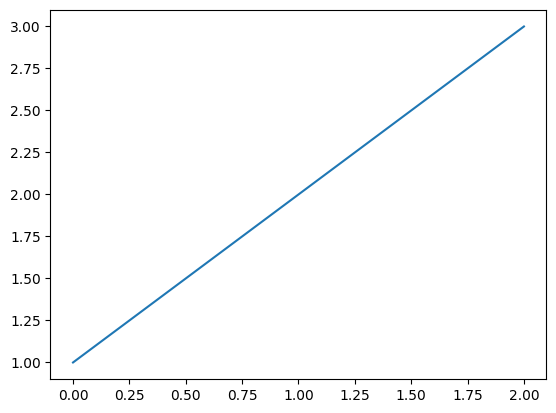

In [7]:
plt.plot([1,2,3])
plt.show()

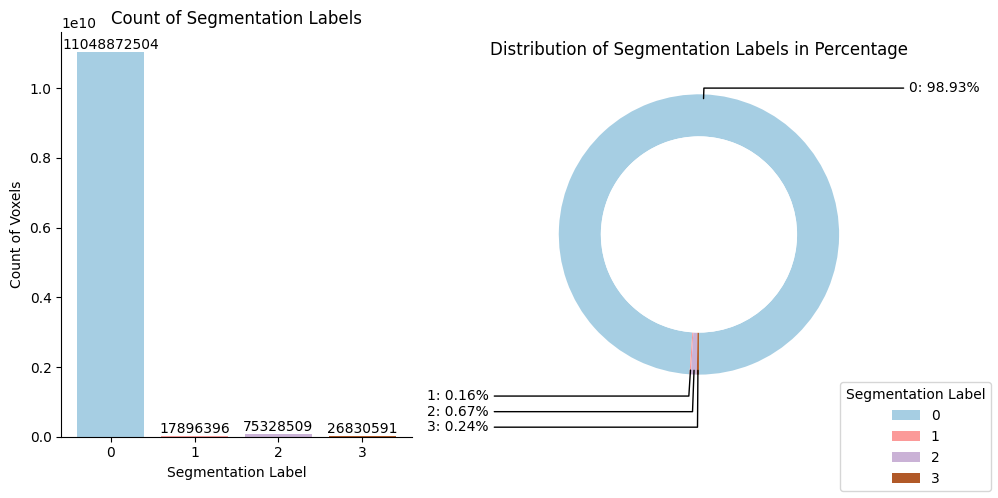

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Colors for both pie and bar plots (using the paired colormap)
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

# Bar Plot for Actual Counts
bars = ax[0].bar([int(float(label)) for label in labels], label_counts.values(), color=colors)
ax[0].set_xlabel("Segmentation Label")
ax[0].set_ylabel("Count of Voxels")
ax[0].set_title("Count of Segmentation Labels")
for i, v in enumerate(label_counts.values()):
    ax[0].text(i, v + 1, str(v), ha='center', va='bottom')

# Remove top and right spines
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

# Pie Chart with Percentage
# Pie chart 
wedges, texts, autotexts = ax[1].pie(percentages,  
                                     colors=colors,
                                     labels=None,
                                     autopct='',
                                     startangle=-90, 
                                     pctdistance=0.85,
                                     wedgeprops=dict(width=0.3))

# Set the title and adjust its position and vertical alignment
title2 = ax[1].set_title("Distribution of Segmentation Labels in Percentage", va='center')
title2.set_y(-1.05)  # Adjust the vertical position of the title

# Draw center circle for 'donut' style
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax[1].add_artist(centre_circle)

# Move the percentages outside and connect with lines
for i, p in enumerate(percentages):
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2.
    y = 0.95 * np.sin(np.deg2rad(angle))
    x = 0.95 * np.cos(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={angle}"    
    text = f"{int(float(labels[i])):.0f}: {p:.2f}%"
    ax[1].annotate(text, xy=(x, y), xytext=(1.5*np.sign(x), 1.1*(y-i/10)),
                   horizontalalignment=horizontalalignment, verticalalignment="center",
                   arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color="black"))

# Add a common legend
fig.legend(bars, [int(float(label)) for label in labels], loc="lower right", title="Segmentation Label")

plt.tight_layout()
plt.show()


### Scaling the test image

#### To illustrate the reshaping in the next code, check out the below

In [ ]:
test2 = test_image_data
print(test2.shape)

test2 = test2.reshape(-1, test2.shape[-1])
print(test2.shape)

test2 = test2.reshape(test_image_data.shape)
print(test2.shape)

(240, 240, 155)
(57600, 155)
(240, 240, 155)


#### Scaling all the pixel data in the t1n, t1c, t2f, t2w images.
- We do not need to scale the segmentation mask labels.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Print the maximum pixel value in our flair test image
print(test_image_data.max())

"""
    The scaler can only be applied to 1D array (Original shape : 240 x 240 x 155)
    So we reshape the image data to 1D array (Reshaped : 57600 x 155)
    Apply Min Max Scaling
    Then reshape it back to original shape (Final shape: 240 x 240 x 155)
"""
# Scaling the flair test image
test_image_flair = scaler.fit_transform(
    test_image_data.reshape(-1, test_image_data.shape[-1])).reshape(test_image_data.shape)

# Loading and scaling t1n image
test_image_t1n = nib.load(INPUT_DATASET_PATH + "/BraTS-GLI-00002-000/BraTS-GLI-00002-000-t1n.nii.gz").get_fdata()
test_image_t1n = scaler.transform(
    test_image_t1n.reshape(-1, test_image_t1n.shape[-1])).reshape(test_image_t1n.shape)

# Loading and scaling t1c image
test_image_t1c = nib.load(INPUT_DATASET_PATH + "/BraTS-GLI-00002-000/BraTS-GLI-00002-000-t1c.nii.gz").get_fdata()
test_image_t1c = scaler.transform(
    test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)

# Loading and scaling t2w image
test_image_t2w = nib.load(INPUT_DATASET_PATH + "/BraTS-GLI-00002-000/BraTS-GLI-00002-000-t2w.nii.gz").get_fdata()
test_image_t2w = scaler.transform(
    test_image_t2w.reshape(-1, test_image_t2w.shape[-1])).reshape(test_image_t2w.shape)


2563.0


### Image Visualisation

In [16]:
i = 10

#### Static Visualisation

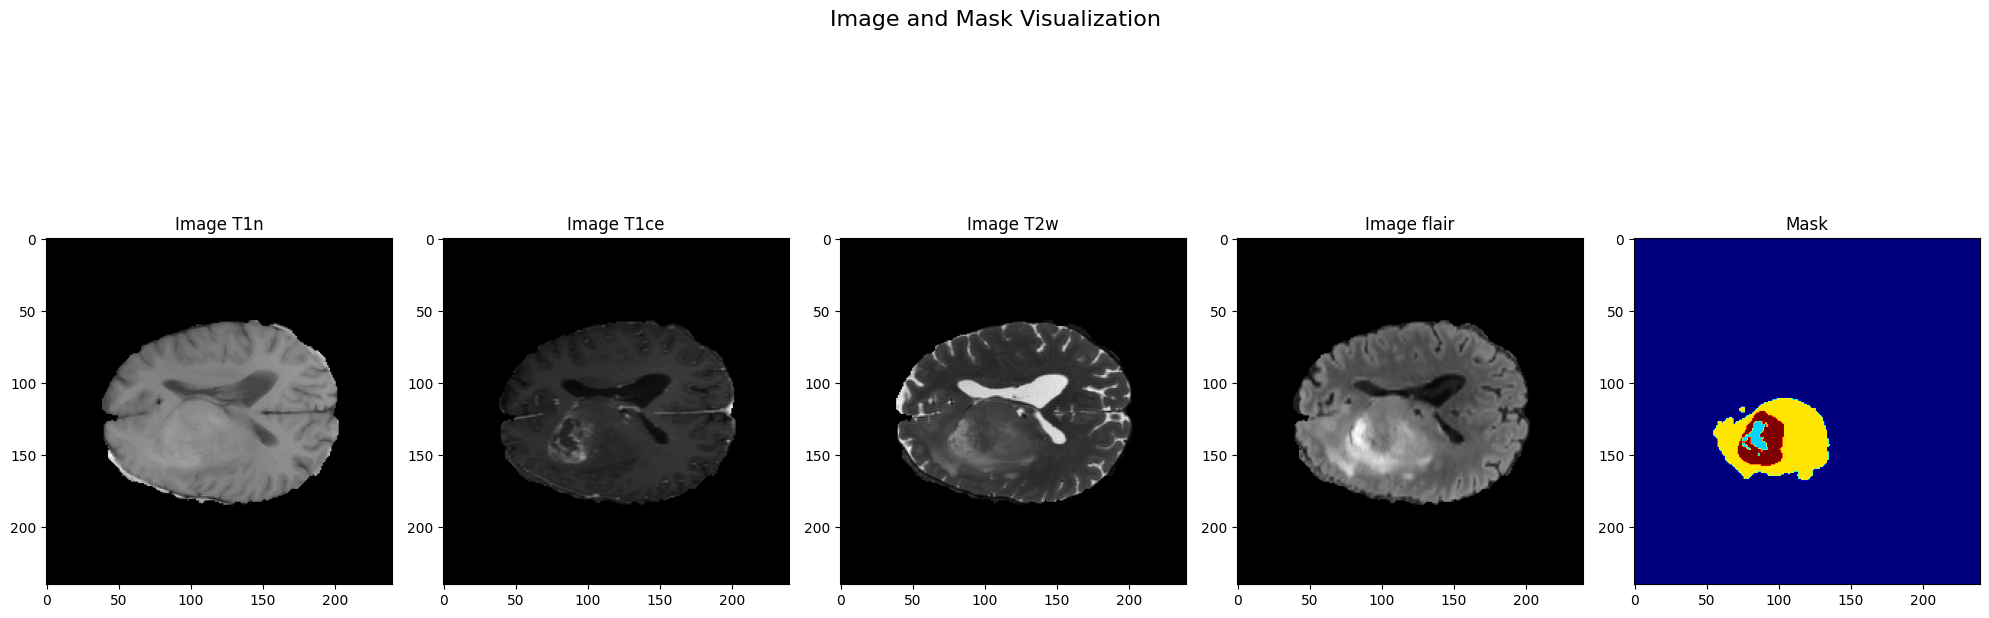

In [27]:
import random
import matplotlib.pyplot as plt

# Select random slice for visualization
# n_slice = random.randint(0, test_mask.shape[2]) 
# print(n_slice)

# Select static slice
n_slice = 90

# Select Colour Scheme
seg_colours = plt.cm.jet

# Create a grid of subplots with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Image and Mask Visualization', fontsize=16)

# T1 Image
axes[0].imshow(test_image_t1n[:,:,n_slice], cmap="gray")
axes[0].set_title('Image T1n') 

# T1 CE Image
axes[1].imshow(test_image_t1c[:,:,n_slice], cmap="gray")
axes[1].set_title('Image T1ce') 

# T2 Image
axes[2].imshow(test_image_t2w[:,:,n_slice], cmap="gray")
axes[2].set_title('Image T2w') 

# T2 Flair Image
axes[3].imshow(test_image_flair[:,:,n_slice], cmap="gray")
axes[3].set_title('Image flair') 

# Mask Image
axes[4].imshow(test_mask[:,:,n_slice], cmap = seg_colours)
axes[4].set_title('Mask')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


#### Looped Visualisation

In [18]:
import time
from IPython.display import clear_output

n_slices = test_mask.shape[2]

while True:
    for n_slice in range(n_slices):
        fig, axes = plt.subplots(1, 5, figsize=(20, 4))
        fig.suptitle('Image and Mask Visualization', fontsize=16)

        # Image T1n
        #img_t1n = test_img[:, :, n_slice, 0]
        axes[0].imshow(test_image_t1n[:,:,n_slice], cmap='gray')
        axes[0].set_title('Image T1n')

        # Image T1c
        #img_t1c = test_img[:, :, n_slice, 1]
        axes[1].imshow(test_image_t1c[:,:,n_slice], cmap='gray')
        axes[1].set_title('Image T1c')

        # Image T2w
        #img_t2w = test_img[:, :, n_slice, 2]
        axes[2].imshow(test_image_t2w[:,:,n_slice], cmap='gray')
        axes[2].set_title('Image T2w')

        # Image T2f
        #img_t2f = test_img[:, :, n_slice, 3]
        axes[3].imshow(test_image_flair[:,:,n_slice], cmap='gray')
        axes[3].set_title('Image T2f')

        # Mask
        #mask = test_mask[:, :, n_slice]
        axes[4].imshow(test_mask[:,:,n_slice], cmap=seg_colours)
        axes[4].set_title('Mask')

        plt.tight_layout()
        plt.show()

        # Delay in milliseconds
        time.sleep(0.0001)

        # Clear the previous plot
        clear_output(wait=True)

    # Break the loop if needed
    break

KeyboardInterrupt: 

### Visualising Cropped Images

#### Static Visualisation

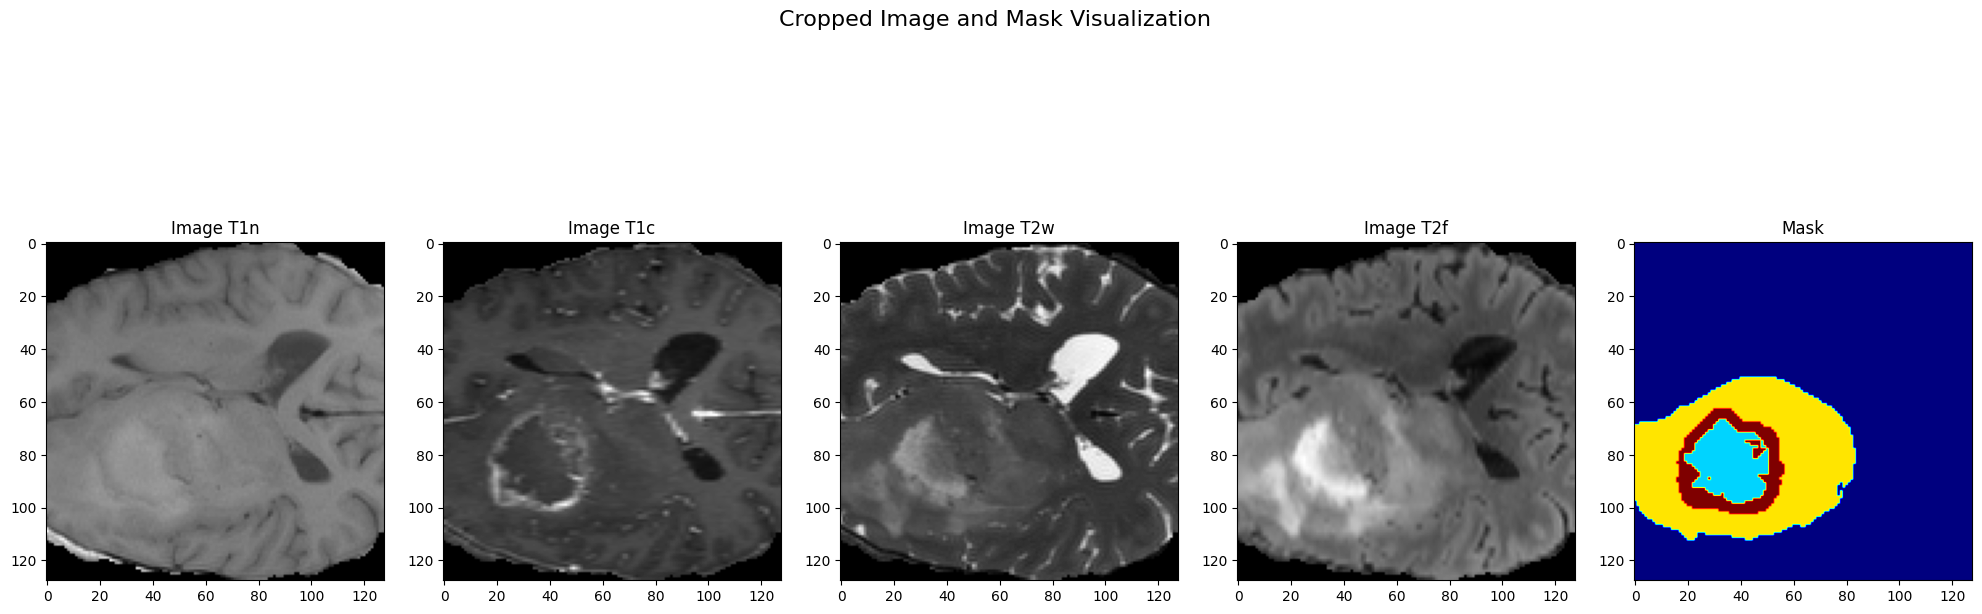

In [16]:
# Combine the 4 images into a single stack
combined_test_image = np.stack([test_image_t1n, test_image_t1c, test_image_t2w, test_image_flair],
                               axis=3)

# Cropping the image to 128x128x128
combined_test_image = combined_test_image[56:184, 56:184, 13:141]

# Cropping the mask precisely as above
test_mask_cropped = test_mask[56:184, 56:184, 13:141]

# Select static slice, adjusted according to cropping
n_slice = 71

# Create a grid of subplots with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('Cropped Image and Mask Visualization', fontsize=16)

# Image T1n
axes[0].imshow(combined_test_image[:,:,n_slice,0], cmap="gray")
axes[0].set_title('Image T1n')

# Image T1c
axes[1].imshow(combined_test_image[:,:,n_slice,1], cmap="gray")
axes[1].set_title('Image T1c')

# Image T2w
axes[2].imshow(combined_test_image[:,:,n_slice,2], cmap="gray")
axes[2].set_title('Image T2w')

# Image T2f
axes[3].imshow(combined_test_image[:,:,n_slice,3], cmap="gray")
axes[3].set_title('Image T2f')

# Mask
axes[4].imshow(test_mask_cropped[:,:,n_slice], cmap=seg_colours)
axes[4].set_title('Mask')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### Looped Visualisation

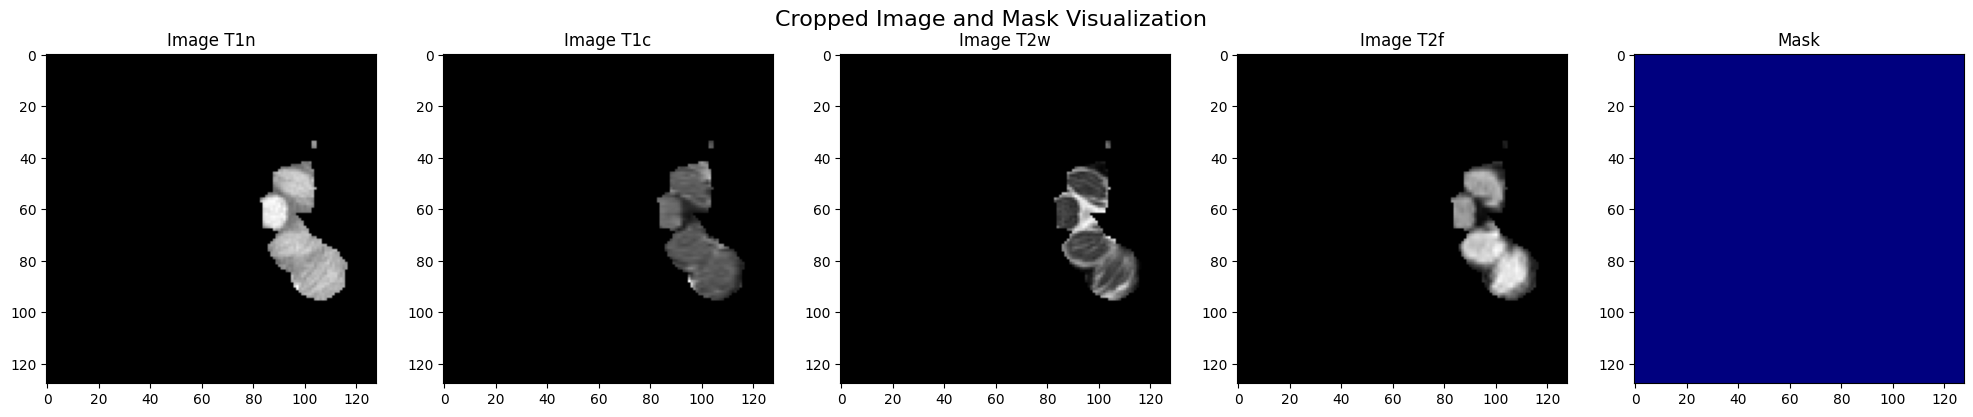

NameError: name 'time' is not defined

In [17]:
# Visualising cropped images
n_slices = test_mask_cropped.shape[2]

while True:
    for n_slice in range(n_slices):
        #n_slice = 82
        fig, axes = plt.subplots(1, 5, figsize=(20, 4))
        fig.suptitle('Cropped Image and Mask Visualization', fontsize=16)

        # Image T1n
        #img_t1n = test_img[:, :, n_slice, 0]
        axes[0].imshow(combined_test_image[:,:,n_slice,0], cmap="gray")
        axes[0].set_title('Image T1n')

        # Image T1c
        #img_t1c = test_img[:, :, n_slice, 1]
        axes[1].imshow(combined_test_image[:,:,n_slice,1], cmap="gray")
        axes[1].set_title('Image T1c')

        # Image T2w
        #img_t2w = test_img[:, :, n_slice, 2]
        axes[2].imshow(combined_test_image[:,:,n_slice,2], cmap="gray")
        axes[2].set_title('Image T2w')

        # Image T2f
        #img_t2f = test_img[:, :, n_slice, 3]
        axes[3].imshow(combined_test_image[:,:,n_slice,3], cmap="gray")
        axes[3].set_title('Image T2f')

        # Mask
        #mask = test_mask[:, :, n_slice]
        axes[4].imshow(test_mask_cropped[:,:,n_slice], cmap='jet')
        axes[4].set_title('Mask')

        plt.tight_layout()
        plt.show()

        # Delay for 200 milliseconds
        time.sleep(0.0001) #200

        # Clear the previous plot
        clear_output(wait=True)

    # Break the loop if needed
    break
